## **Context**

Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

## **Objective**

Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

## **Data Description**

The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.

## **Data Dictionary**

- RowNumber: Unique number of sequence number
- CustomerId: Unique ID which is assigned to each customer
- Surname: Last name of the customer 
- CreditScore: It defines the credit history of the customer.  
- Geography: A customer’s location    
- Gender: It defines the Gender of the customer   
- Age: Age of the customer     
- Tenure: Number of years for which the customer has been with the bank
- NumOfProducts: It refers to the number of products that a customer has purchased through the bank.
- Balance: Account balance
- HasCrCard: It is a categorical variable that decides whether the customer has a credit card or not.
- EstimatedSalary: Estimated salary 
- ActiveMember: It is a categorical variable that decides whether the customer is an active member of the bank or not ( Active member in the sense, using bank - Products regularly, making transactions, etc )
- Exited: It is a categorical variable that decides whether the customer left the bank within six months or not. It can take two values 
  0=No ( Customer did not leave the bank )            1=Yes ( Customer left the bank )

## Reading the Dataset and Feature Elimination

Now, let us import the data and necessary libraries and get it ready for modelling.

In [1]:
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.optimizers
from keras.models import Sequential  # importing the Sequential Model
from keras.layers import Dense       # importing Dense layer

optimizer=keras.optimizers.RMSprop(learning_rate=0.01)

import pandas as pd
import numpy as np
import seaborn as sns
import sklearn     
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
    classification_report
)

# To build model for prediction
from sklearn.linear_model import LogisticRegression
# to scale the data using z-score
from sklearn.preprocessing import StandardScaler


In [2]:
# to suppress warnings
import warnings

warnings.filterwarnings("ignore") 

In [213]:
banks_data = pd.read_csv('Churn.csv')
banks_data

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

## Overview of Dataset

Let's check the null values in each column of the dataset

In [214]:
banks_data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

As we can see, there are no null values in any of the column

In [215]:
banks_data.shape

(10000, 14)

In [216]:
banks_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [217]:
banks_data.describe().T

count          mean           std          min  \
RowNumber        10000.0  5.000500e+03   2886.895680         1.00   
CustomerId       10000.0  1.569094e+07  71936.186123  15565701.00   
CreditScore      10000.0  6.505288e+02     96.653299       350.00   
Age              10000.0  3.892180e+01     10.487806        18.00   
Tenure           10000.0  5.012800e+00      2.892174         0.00   
Balance          10000.0  7.648589e+04  62397.405202         0.00   
NumOfProducts    10000.0  1.530200e+00      0.581654         1.00   
HasCrCard        10000.0  7.055000e-01      0.455840         0.00   
IsActiveMember   10000.0  5.151000e-01      0.499797         0.00   
EstimatedSalary  10000.0  1.000902e+05  57510.492818        11.58   
Exited           10000.0  2.037000e-01      0.402769         0.00   

                         25%           50%           75%          max  
RowNumber            2500.75  5.000500e+03  7.500250e+03     10000.00  
CustomerId       15628528.25  1.569074e+07  1.575323e+07  15815690.00  
CreditScore           584.00  6.520000e+02  7.180000e+02       850.00  
Age                    32.00  3.700000e+01  4.400000e+01        92.00  
Tenure                  3.00  5.000000e+00  7.000000e+00        10.00  
Balance                 0.00  9.719854e+04  1.276442e+05    250898.09  
NumOfProducts           1.00  1.000000e+00  2.000000e+00         4.00  
HasCrCard               0.00  1.000000e+00  1.000000e+00         1.00  
IsActiveMember          0.00  1.000000e+00  1.000000e+00         1.00  
EstimatedSalary     51002.11  1.001939e+05  1.493882e+05    199992.48  
Exited                  0.00  0.000000e+00  0.000000e+00         1.00

Let's check for the unique observations 

In [218]:
#just some basic preprocessing
banks_data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

##Data Preprocessing



Let's check for the duplicate observations 

In [219]:
# let's check for duplicate observations
banks_data.duplicated().sum()

0

- There are no duplicates.

### Feature Elimination

- We can drop the RowNumber, CustomerId and Surname as they do not add any value to the analysis or the model.

In [220]:
banks_data.drop(columns=["RowNumber"], inplace=True)
banks_data.drop(columns=["CustomerId"], inplace=True)
banks_data.drop(columns=["Surname"], inplace=True)


- To utilise the columns, we’ll need to find a way to make them numerical, One-hot Encoding

In [221]:
#creating dummy variables for the categorical features
banks_Original_data=banks_data
banks_data = pd.get_dummies(banks_data,drop_first=True)
banks_data = banks_data.astype('float32') # we will need to convert the dataset to float in order to be able to convert it into tensors later.
banks_data

CreditScore   Age  Tenure        Balance  NumOfProducts  HasCrCard  \
0           619.0  42.0     2.0       0.000000            1.0        1.0   
1           608.0  41.0     1.0   83807.859375            1.0        0.0   
2           502.0  42.0     8.0  159660.796875            3.0        1.0   
3           699.0  39.0     1.0       0.000000            2.0        0.0   
4           850.0  43.0     2.0  125510.820312            1.0        1.0   
...           ...   ...     ...            ...            ...        ...   
9995        771.0  39.0     5.0       0.000000            2.0        1.0   
9996        516.0  35.0    10.0   57369.609375            1.0        1.0   
9997        709.0  36.0     7.0       0.000000            1.0        0.0   
9998        772.0  42.0     3.0   75075.312500            2.0        1.0   
9999        792.0  28.0     4.0  130142.789062            1.0        1.0   

      IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0                1.0    101348.882812     1.0                0.0   
1                1.0    112542.578125     0.0                0.0   
2                0.0    113931.570312     1.0                0.0   
3                0.0     93826.632812     0.0                0.0   
4                1.0     79084.101562     0.0                0.0   
...              ...              ...     ...                ...   
9995             0.0     96270.640625     0.0                0.0   
9996             1.0    101699.773438     0.0                0.0   
9997             1.0     42085.578125     1.0                0.0   
9998             0.0     92888.523438     1.0                1.0   
9999             0.0     38190.781250     0.0                0.0   

      Geography_Spain  Gender_Male  
0                 0.0          0.0  
1                 1.0          0.0  
2                 0.0          0.0  
3                 0.0          0.0  
4                 1.0          0.0  
...               ...          ...  
9995              0.0          1.0  
9996              0.0          1.0  
9997              0.0          0.0  
9998              0.0          1.0  
9999              0.0          0.0  

[10000 rows x 12 columns]

In [222]:
banks_data['Exited'].value_counts()

0.0    7963
1.0    2037
Name: Exited, dtype: int64

Out of 10,000, 2073 left

Exploring the column names

In [223]:
banks_data.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

## Exploratory Data Analysis (EDA)



In [224]:
df=banks_data.copy()

It’s always good to get some insight about the target variable. The target or dependent variable is price in our case.


In [15]:
# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

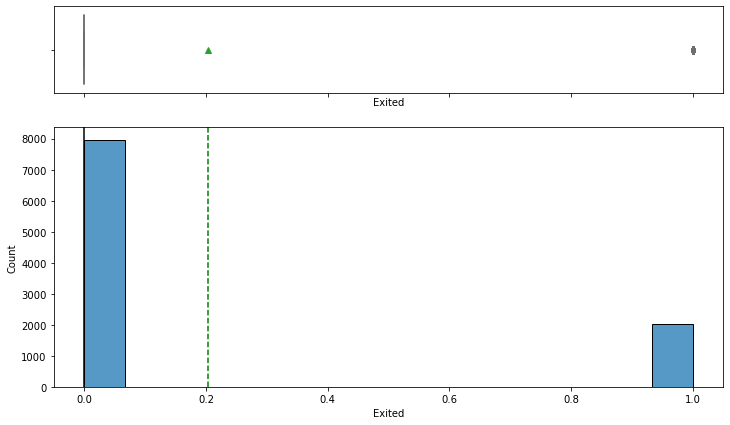

In [16]:
histogram_boxplot(df, "Exited")

<AxesSubplot:xlabel='Age', ylabel='Density'>

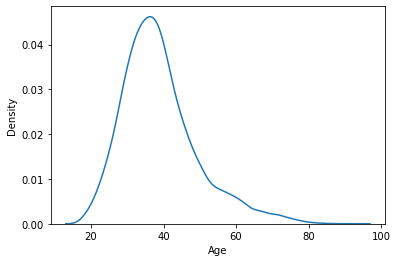

In [37]:
sns.distplot(df['Age'], hist=False) # adding an argument to plot only frequency polygon

It can be seen from the graph that the data is looking approx symmetric and the peak is around 10000-15000. Another way of checking the distribution and outliers is boxplot:

<AxesSubplot:xlabel='Exited', ylabel='Density'>

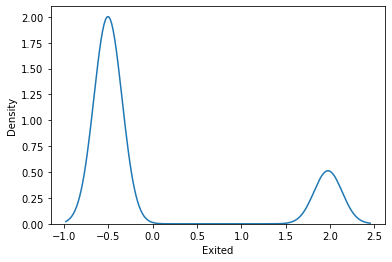

In [42]:
sns.distplot(df['Exited'], hist=False) # adding an argument to plot only frequency polygon

Frequency distribution has two peaks, meaning, something causing the spikes.

<AxesSubplot:xlabel='IsActiveMember', ylabel='Density'>

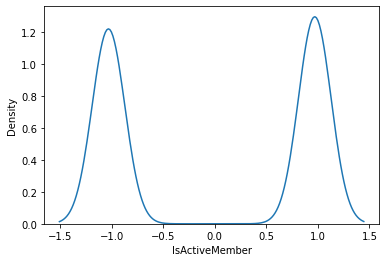

In [43]:
sns.distplot(df['IsActiveMember'], hist=False) # adding an argument to plot only frequency polygon

Frequency distribution has two bell shape curves, meaning, something causing the spikes.

<AxesSubplot:xlabel='Balance', ylabel='Density'>

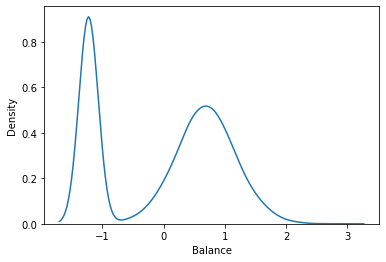

In [44]:
sns.distplot(df['Balance'], hist=False) # adding an argument to plot only frequency polygon

There is a high number of frequency for near zero balance, while 50,000 to 225,000 is a normal balance for the employees of this dataset.

## Bivariate analysis

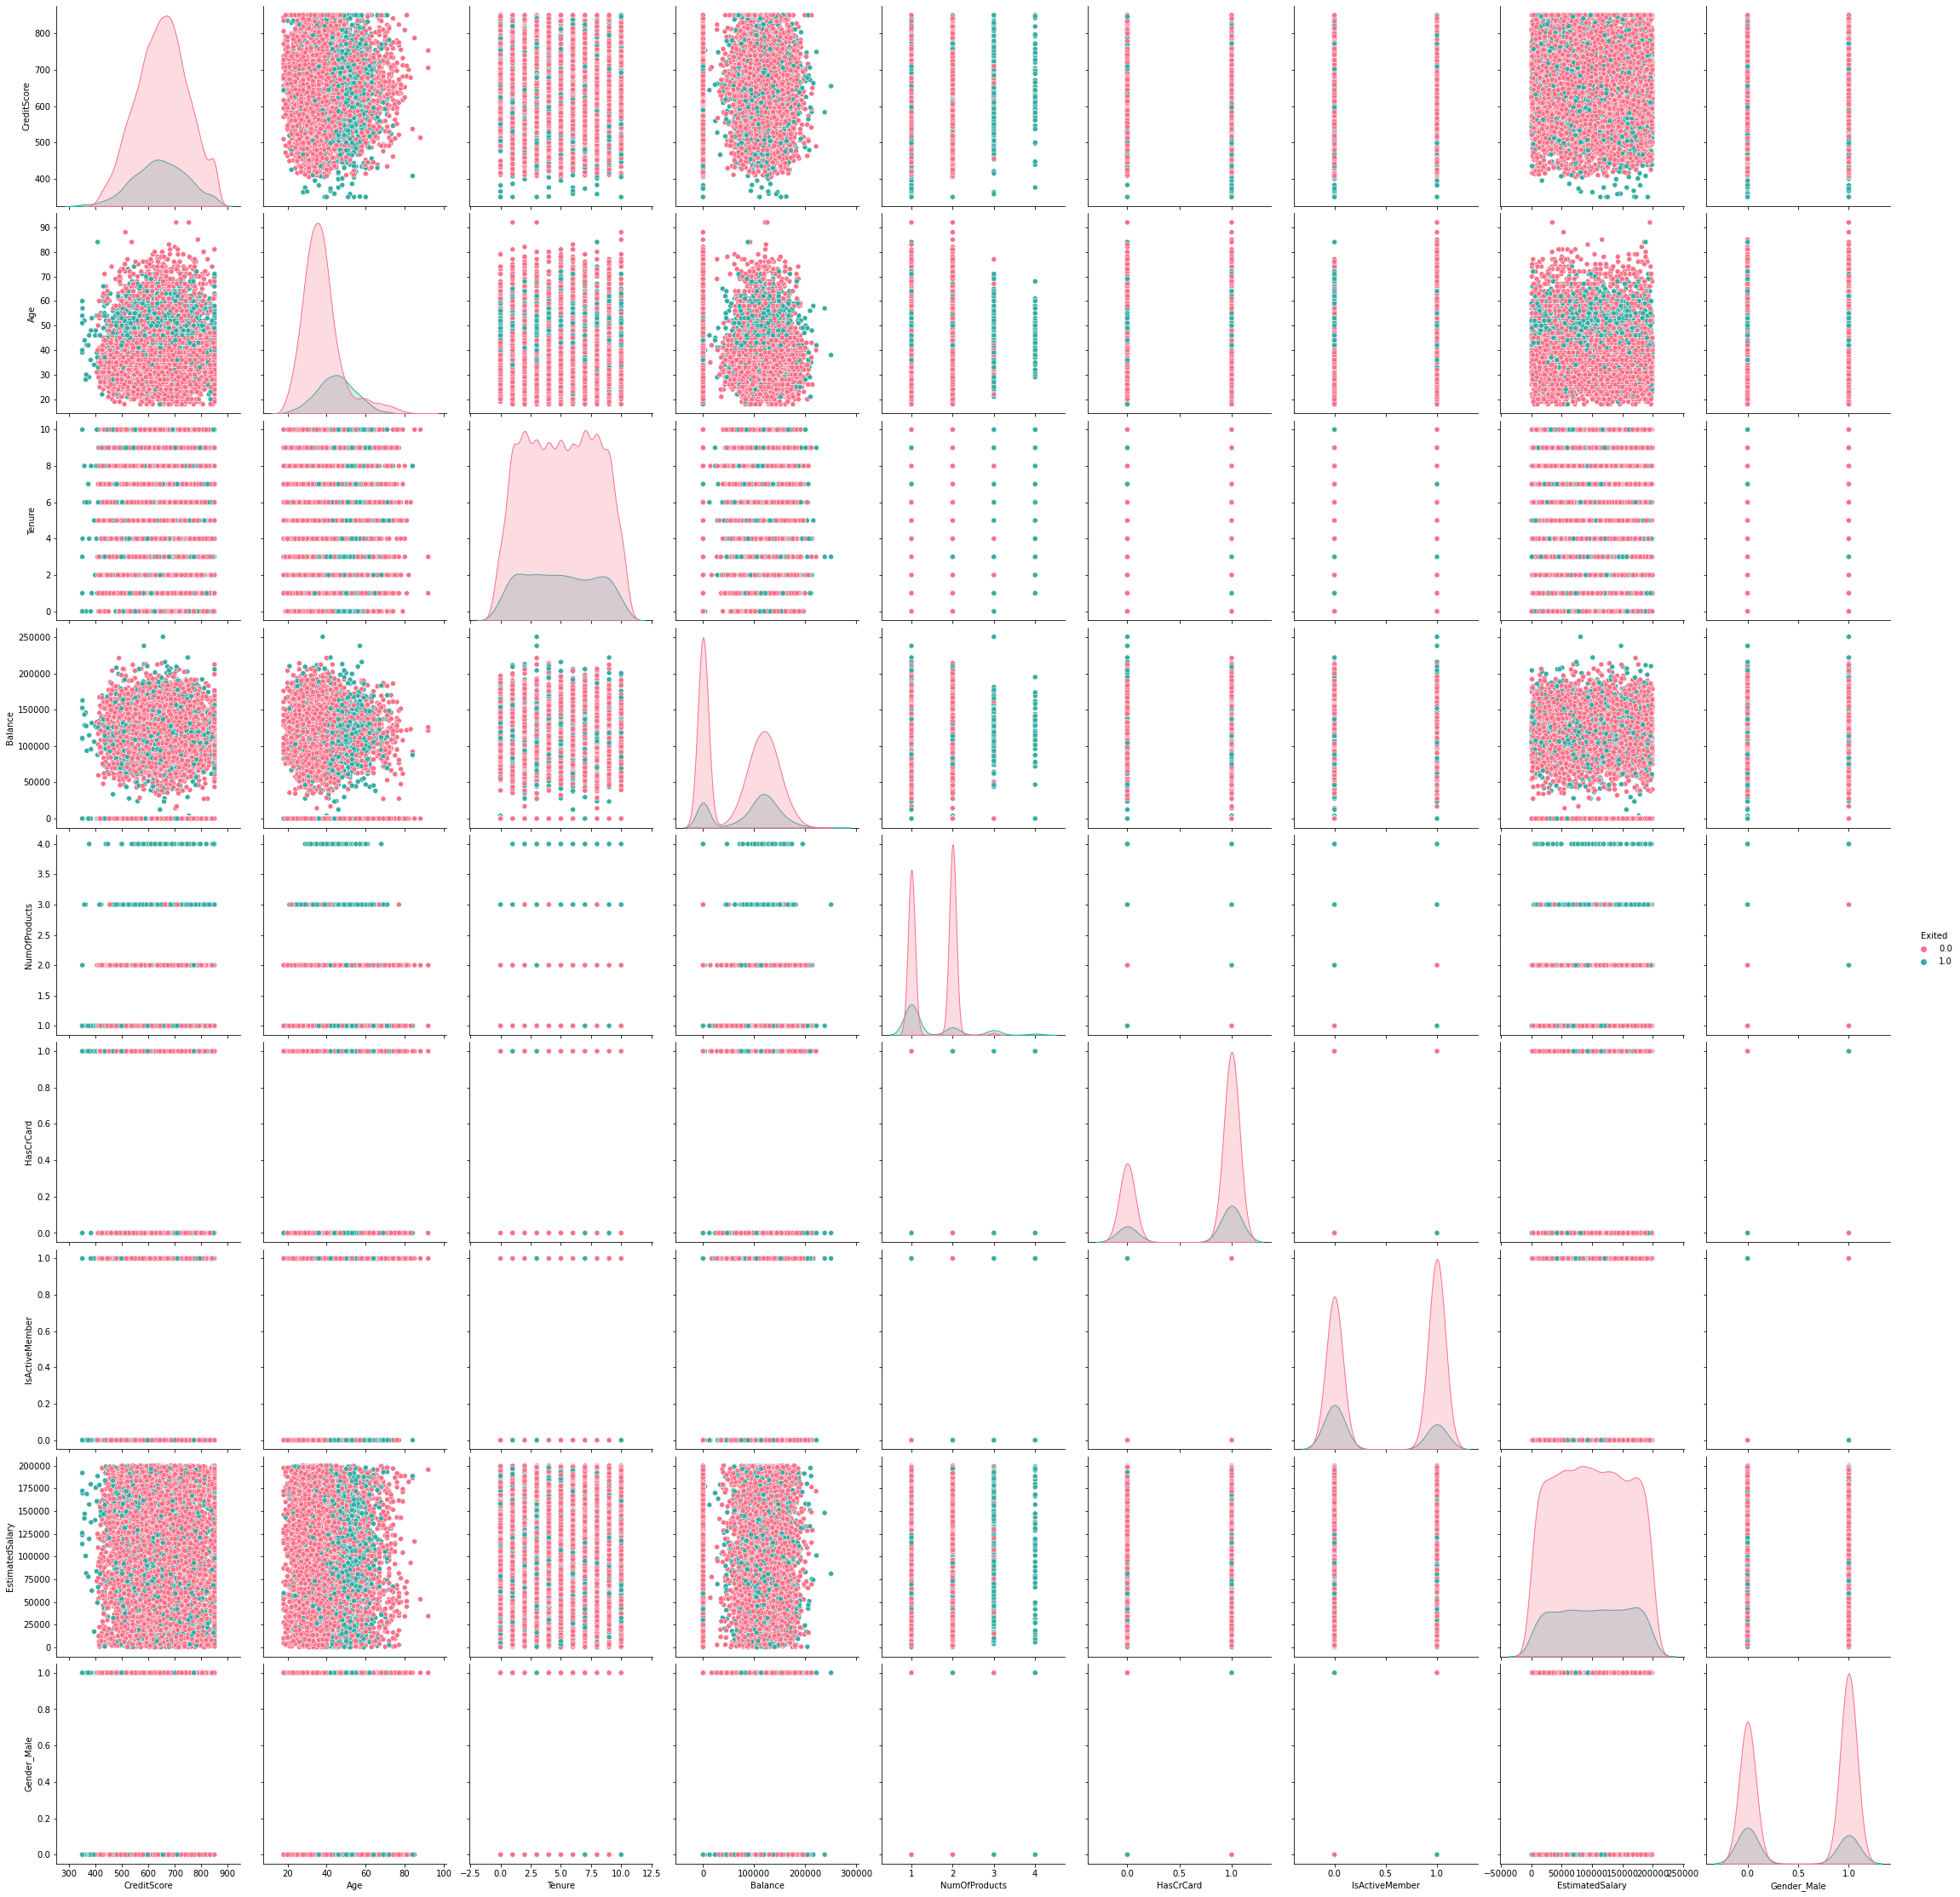

In [38]:
sns.pairplot(df,hue = 'Exited',diag_kind = "kde",kind = "scatter",palette = "husl",height=3.5)
plt.show()

### Outliers 

As we see outliers but not many.





Let’s try to have a quick look at the joint distribution of a few pairs of columns from the training set.

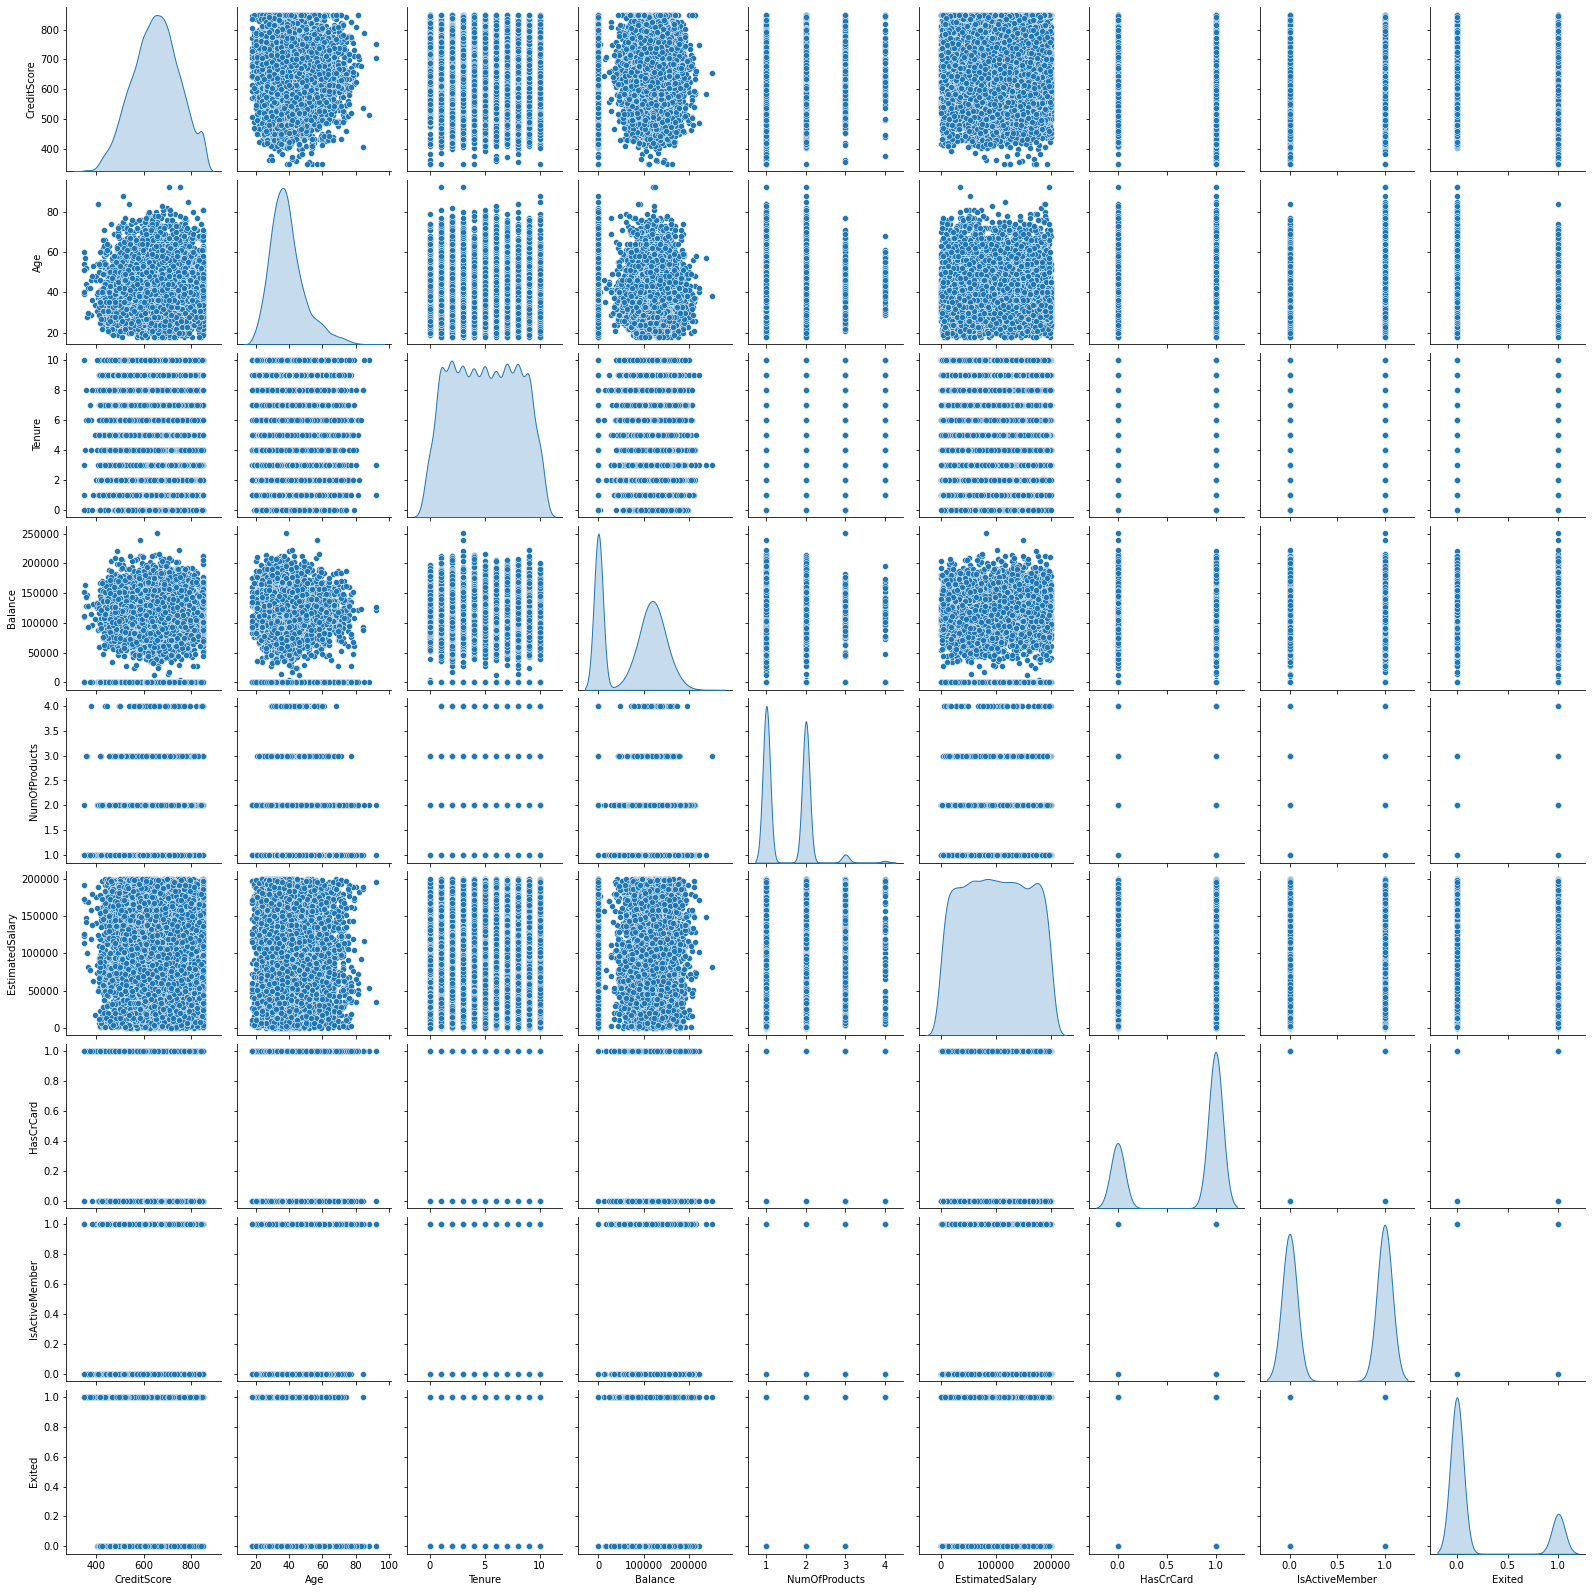

In [39]:
sns.pairplot(df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'HasCrCard','IsActiveMember', 'Exited' ]], diag_kind="kde")

- We can see Credit Score rising when NumOfProducts rising, indicating high positive coorelation. Most employees have 1, 2 or 3 products. 
- As NumberofProducts decreasing with increase in Age.
- Tenure is rising with Age.
- Those who had cards have lower balance than those who hadn't.
- Higher Age Group exited more than than those in the lower age groups.
- Balance has two different clusters, first is sharp and narrow indicating high balance, few employees and median balance most for employees. 
- Those having higher balance exited more than who hadn't.
- Few Employees have zero or negligible balance.




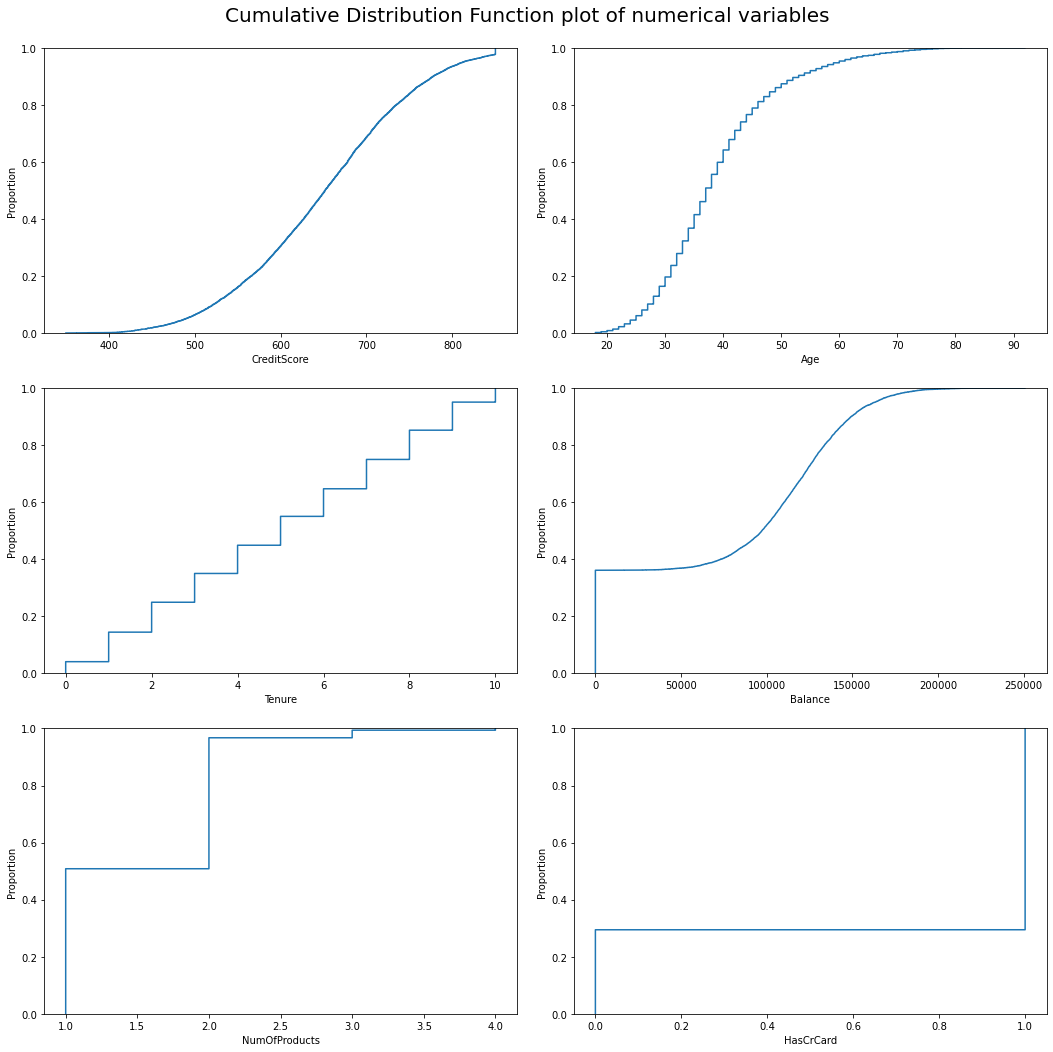

In [40]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle("Cumulative Distribution Function plot of numerical variables", fontsize=20)

counter = 0

for ii in range(3):
    sns.ecdfplot(data=df, ax=axes[ii][0], x=df.columns.tolist()[counter])
    counter = counter + 1
    if counter != 10:
        sns.ecdfplot(data=df, ax=axes[ii][1], x=df.columns.tolist()[counter])
        counter = counter + 1
    else:
        pass

fig.tight_layout(pad=2.0)

- The above CDLF plot shows the range of various features.

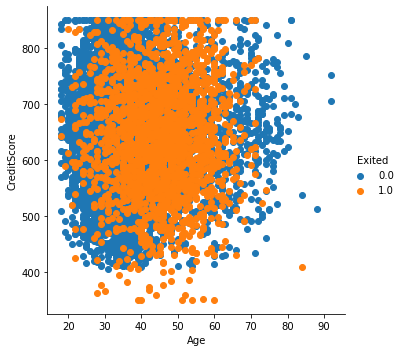

In [21]:
sns.FacetGrid(df, hue = 'Exited',height=5).map(plt.scatter,'Age','CreditScore').add_legend()

Very few Employees above 80 exited and has outliers.

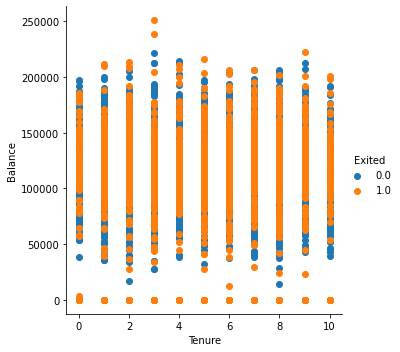

In [22]:
sns.FacetGrid(df, hue = 'Exited',height=5).map(plt.scatter,'Tenure', 'Balance').add_legend()

Most employees whose tenure was between 2 and 4 years had a widest range of salary upto 250,000 exited.

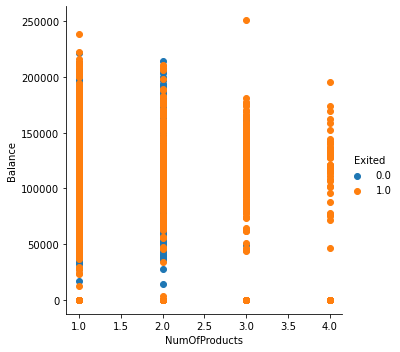

In [23]:
sns.FacetGrid(df, hue = 'Exited',height=5).map(plt.scatter,'NumOfProducts', 'Balance').add_legend()

Most of those who had 1 product, exited.

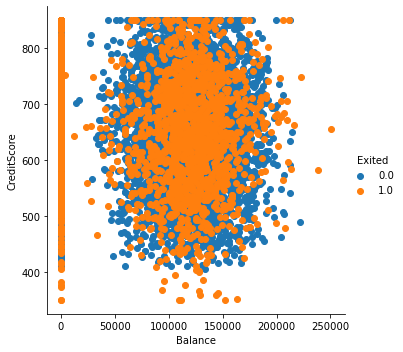

In [24]:
sns.FacetGrid(df, hue = 'Exited',height=5).map(plt.scatter,'Balance', 'CreditScore').add_legend()

More employees exited who had salary of 100,000 to 150,000.

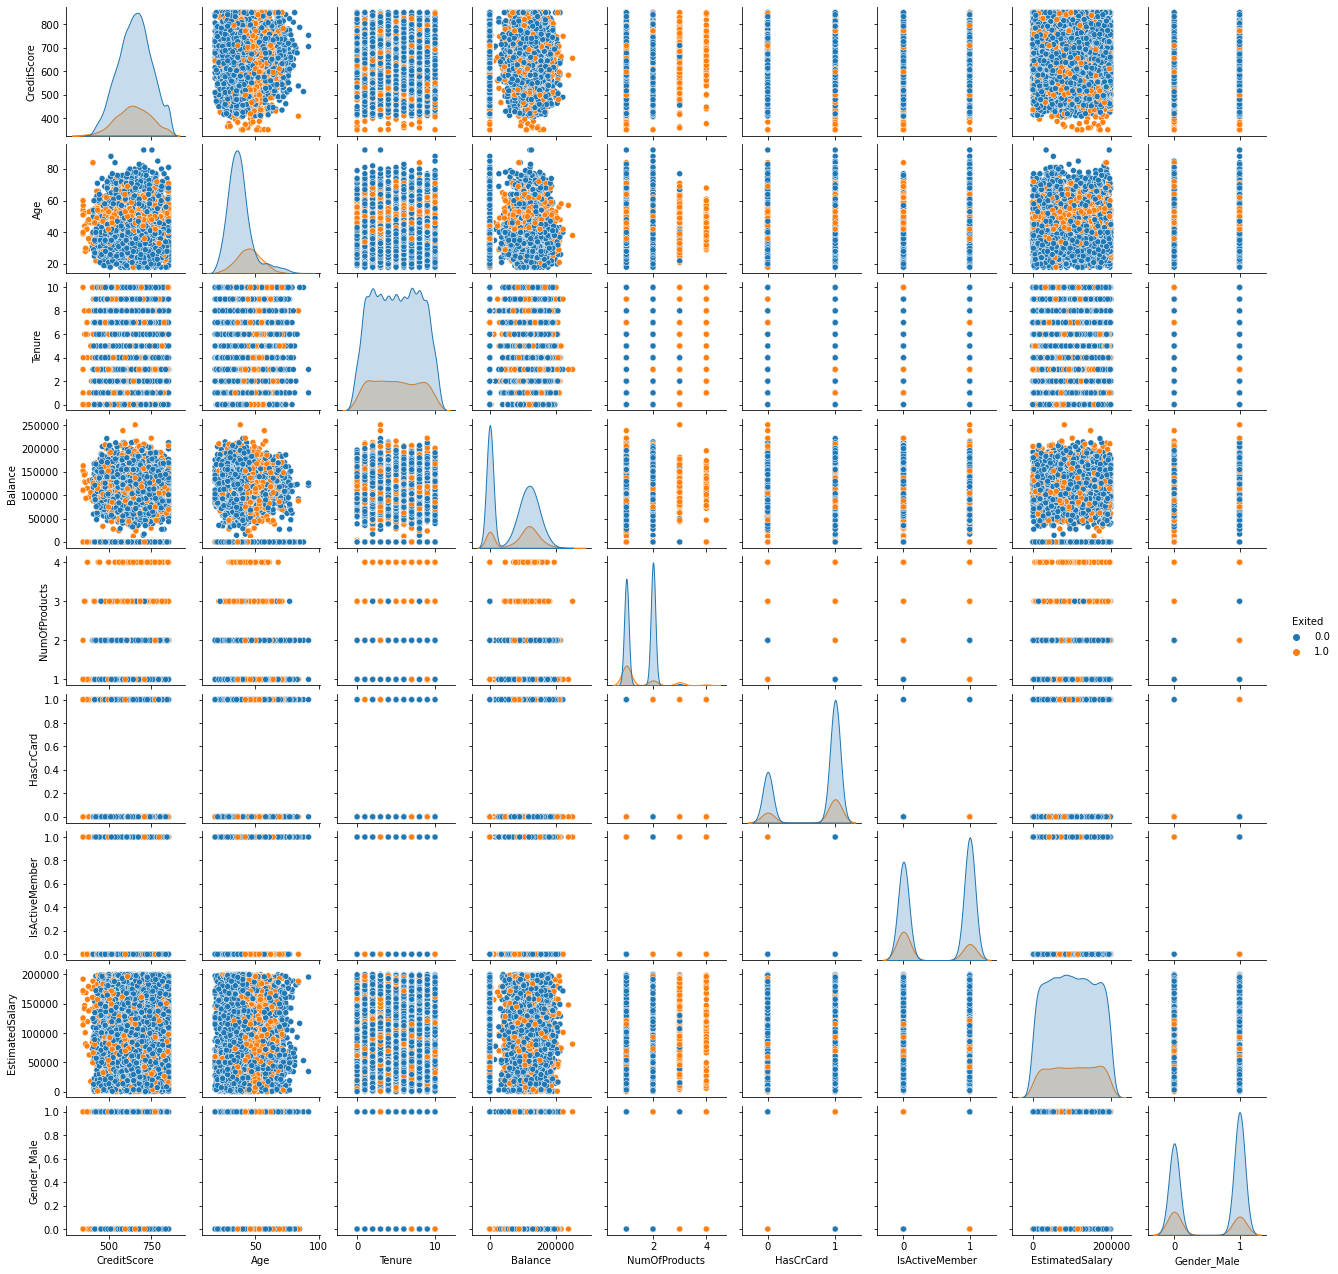

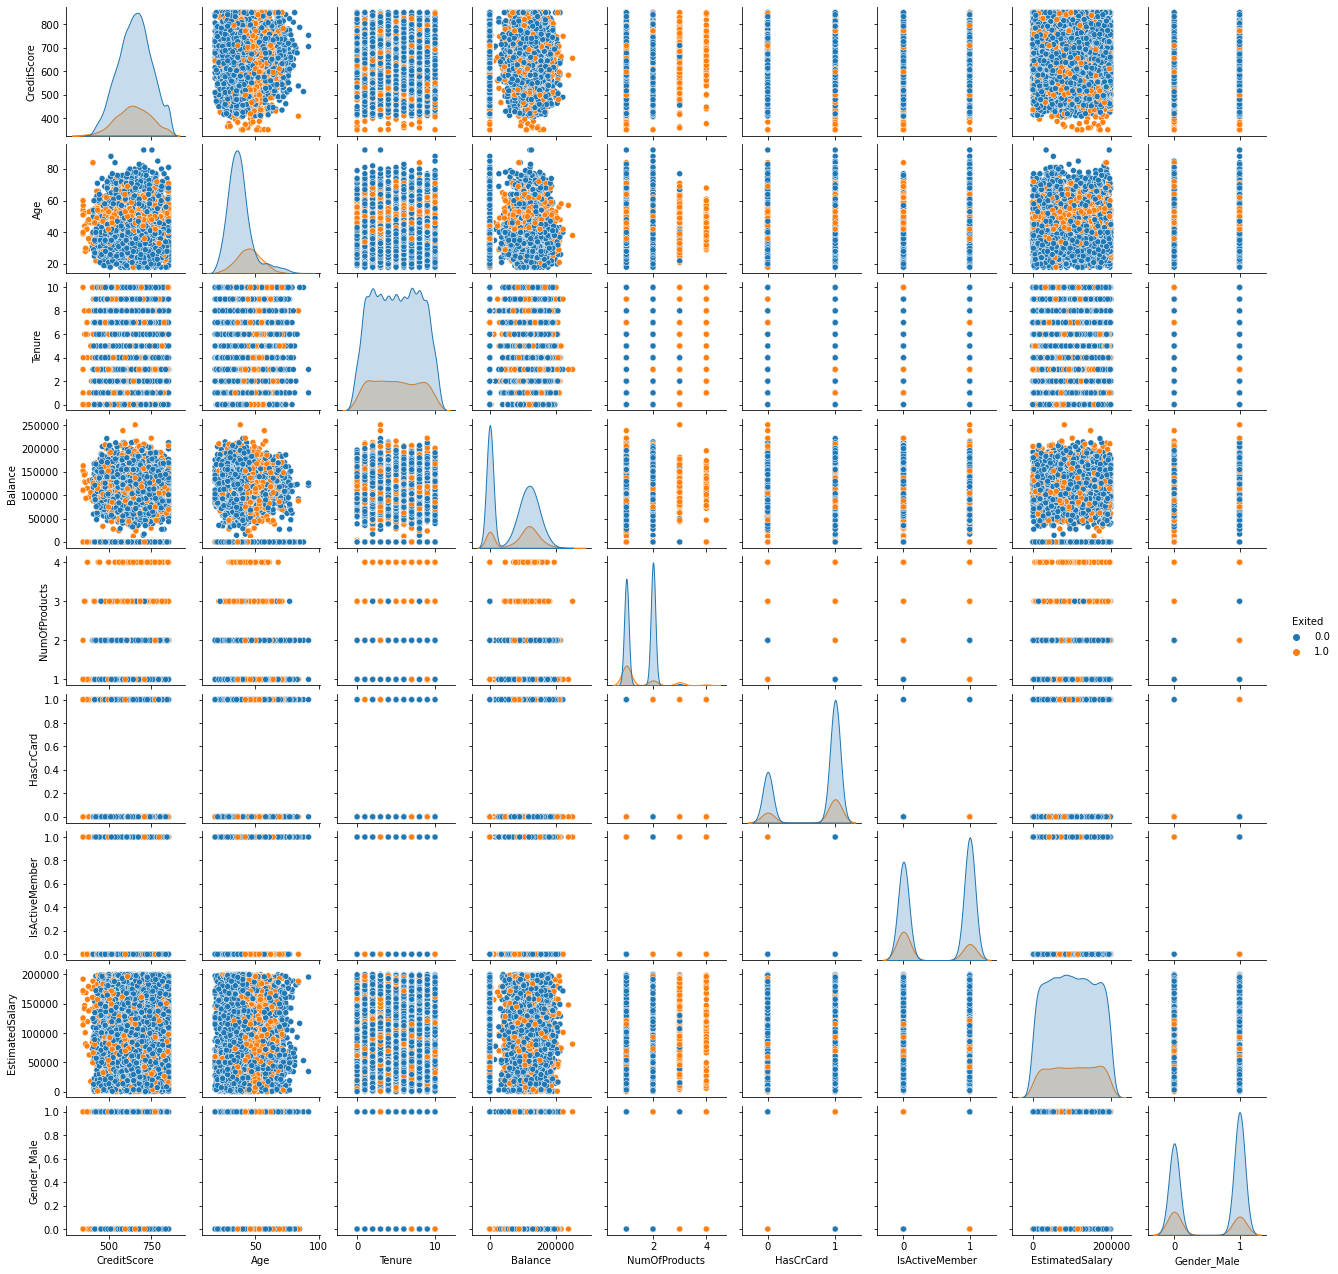

In [41]:
sns_plot = sns.pairplot(df, height=2.0, hue="Exited")
sns_plot.savefig("pairplot.png")


##Double click on Image below
display(Image(filename='./pairplot.png'))

Lets visualize the correlation between the features 

<AxesSubplot:>

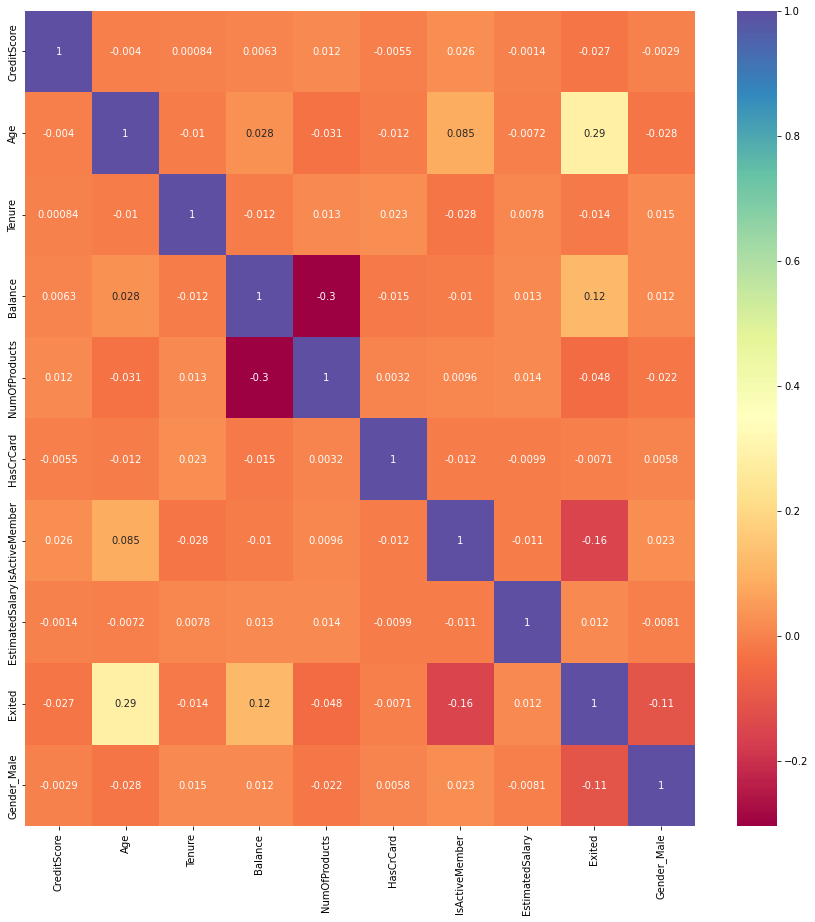

In [42]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(),cmap="Spectral",ax=ax,annot=True)

* Balance and NumOfProducts, and Gender and Exited have negative coorelation.

* Age and Exited have sligttly negative corrlation. 


## Data Pre-processing

In [254]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn_with_threshold(
    model, predictors, target, threshold=0.2
):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

##Separate the features from labels



In [226]:
#getting the features and labels and finally splitting the test and train data.

X = df.drop(columns="Exited")
Y = df["Exited"]

In [227]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  float32
 1   Age                10000 non-null  float32
 2   Tenure             10000 non-null  float32
 3   Balance            10000 non-null  float32
 4   NumOfProducts      10000 non-null  float32
 5   HasCrCard          10000 non-null  float32
 6   IsActiveMember     10000 non-null  float32
 7   EstimatedSalary    10000 non-null  float32
 8   Geography_Germany  10000 non-null  float32
 9   Geography_Spain    10000 non-null  float32
 10  Gender_Male        10000 non-null  float32
dtypes: float32(11)
memory usage: 429.8 KB


In [228]:
pd.DataFrame(Y).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Exited  10000 non-null  float32
dtypes: float32(1)
memory usage: 39.2 KB


#### Splitting the dataset

In [229]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=1
)

In [230]:
# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1
)
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape)

(6000, 11) (2000, 11) (2000, 11) (6000,)


In [231]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 4495 to 7029
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        6000 non-null   float32
 1   Age                6000 non-null   float32
 2   Tenure             6000 non-null   float32
 3   Balance            6000 non-null   float32
 4   NumOfProducts      6000 non-null   float32
 5   HasCrCard          6000 non-null   float32
 6   IsActiveMember     6000 non-null   float32
 7   EstimatedSalary    6000 non-null   float32
 8   Geography_Germany  6000 non-null   float32
 9   Geography_Spain    6000 non-null   float32
 10  Gender_Male        6000 non-null   float32
dtypes: float32(11)
memory usage: 304.7 KB


In [232]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 9953 to 2745
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        2000 non-null   float32
 1   Age                2000 non-null   float32
 2   Tenure             2000 non-null   float32
 3   Balance            2000 non-null   float32
 4   NumOfProducts      2000 non-null   float32
 5   HasCrCard          2000 non-null   float32
 6   IsActiveMember     2000 non-null   float32
 7   EstimatedSalary    2000 non-null   float32
 8   Geography_Germany  2000 non-null   float32
 9   Geography_Spain    2000 non-null   float32
 10  Gender_Male        2000 non-null   float32
dtypes: float32(11)
memory usage: 101.6 KB


In [233]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 7857 to 5354
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        2000 non-null   float32
 1   Age                2000 non-null   float32
 2   Tenure             2000 non-null   float32
 3   Balance            2000 non-null   float32
 4   NumOfProducts      2000 non-null   float32
 5   HasCrCard          2000 non-null   float32
 6   IsActiveMember     2000 non-null   float32
 7   EstimatedSalary    2000 non-null   float32
 8   Geography_Germany  2000 non-null   float32
 9   Geography_Spain    2000 non-null   float32
 10  Gender_Male        2000 non-null   float32
dtypes: float32(11)
memory usage: 101.6 KB


In [234]:
pd.DataFrame(y_train).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 4495 to 7029
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Exited  6000 non-null   float32
dtypes: float32(1)
memory usage: 70.3 KB


#### Scaling after splitting

In [235]:
# scaling the data before clustering
scaler = StandardScaler()
subset = X_train.copy()
subset_scaled = scaler.fit_transform(subset)
# creating a dataframe of the scaled data
X_train = pd.DataFrame(subset_scaled, columns=subset.columns)

In [236]:
# scaling the data before clustering
scaler = StandardScaler()
subset = X_test.copy()
subset_scaled = scaler.fit_transform(subset)
# creating a dataframe of the scaled data
X_test = pd.DataFrame(subset_scaled, columns=subset.columns)

In [237]:
# scaling the data before clustering
scaler = StandardScaler()
subset = X_val.copy()
subset_scaled = scaler.fit_transform(subset)
# creating a dataframe of the scaled data
X_val = pd.DataFrame(subset_scaled, columns=subset.columns)

In [238]:
y_train = target_scaler.fit_transform(y_train.values.reshape(-1,1))
y_test = target_scaler.fit_transform(y_test.values.reshape(-1,1))
y_val=target_scaler.fit_transform(y_val.values.reshape(-1,1))

In [239]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        6000 non-null   float32
 1   Age                6000 non-null   float32
 2   Tenure             6000 non-null   float32
 3   Balance            6000 non-null   float32
 4   NumOfProducts      6000 non-null   float32
 5   HasCrCard          6000 non-null   float32
 6   IsActiveMember     6000 non-null   float32
 7   EstimatedSalary    6000 non-null   float32
 8   Geography_Germany  6000 non-null   float32
 9   Geography_Spain    6000 non-null   float32
 10  Gender_Male        6000 non-null   float32
dtypes: float32(11)
memory usage: 257.9 KB


In [240]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        2000 non-null   float32
 1   Age                2000 non-null   float32
 2   Tenure             2000 non-null   float32
 3   Balance            2000 non-null   float32
 4   NumOfProducts      2000 non-null   float32
 5   HasCrCard          2000 non-null   float32
 6   IsActiveMember     2000 non-null   float32
 7   EstimatedSalary    2000 non-null   float32
 8   Geography_Germany  2000 non-null   float32
 9   Geography_Spain    2000 non-null   float32
 10  Gender_Male        2000 non-null   float32
dtypes: float32(11)
memory usage: 86.1 KB


In [241]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        2000 non-null   float32
 1   Age                2000 non-null   float32
 2   Tenure             2000 non-null   float32
 3   Balance            2000 non-null   float32
 4   NumOfProducts      2000 non-null   float32
 5   HasCrCard          2000 non-null   float32
 6   IsActiveMember     2000 non-null   float32
 7   EstimatedSalary    2000 non-null   float32
 8   Geography_Germany  2000 non-null   float32
 9   Geography_Spain    2000 non-null   float32
 10  Gender_Male        2000 non-null   float32
dtypes: float32(11)
memory usage: 86.1 KB


## Model building

### TensorFlow implementation

#### Let us try modelling now. We will use a few concepts covered in the practice exercise shared with the course material.

##Converting the Numpy array into tensors 

In [242]:
# let us now convert the data elements into tensors as we need tensors to be fed into different tensorflow based operations
#X-train and X_test were converted to numpy arrays while transformations while the other two need to be transformed into numpy arrays.
X_train1=tf.convert_to_tensor(X_train)
y_train1=tf.convert_to_tensor(y_train)
X_test1=tf.convert_to_tensor(X_test)
y_test1=tf.convert_to_tensor(y_test)
X_val1=tf.convert_to_tensor(X_val)
y_val1=tf.convert_to_tensor(y_val)

In [243]:
#printing the shape of training tensor
X_train1.shape[1]

11

In [244]:
input_dim = X_train1.shape[1]
output_dim = 1
learning_rate = 0.019

# Let us initialize the weights and bias variables. 
weights = tf.Variable(tf.zeros(shape=(input_dim, output_dim), dtype= tf.float32))
bias = tf.Variable(tf.ones(shape=(output_dim,), dtype= tf.float32))

def predict(features):
  return tf.matmul(features, weights) + bias # note that the matmul is matrix multiplication and is needed for calculating predictions

def compute_loss(y_true, predictions):
  return tf.reduce_mean(tf.square(y_true - predictions)) # mean square error

# Let us now define a function to train the model. We will call the other functions in function definition.
def train(x, y,x1,y1):
  with tf.GradientTape() as tape:
    predictions = predict(x)
    loss = compute_loss(y, predictions)
    
    dloss_dw, dloss_db = tape.gradient(loss, [weights, bias]) #note that we can pass lists as well here.
  weights.assign_sub(learning_rate * dloss_dw)
  bias.assign_sub(learning_rate * dloss_db)
  #calculating the validation loss
  predictions1 = predict(x1)
  v_loss = compute_loss(y1, predictions1)
  
  return loss,v_loss

#### Let us now call the train function with 1000 epochs

In [245]:
training_loss=[]
val_loss=[]

for epoch in range(1000):
  loss,v_loss = train(X_train1, y_train1,X_val1,y_val1)
  training_loss.append(loss)
  val_loss.append(v_loss)
  
  print('Epoch %d: Training Loss = %.4f, validation_loss= %.4f' % (epoch, float(loss),float(v_loss)))


print('Final Weights after 100 epochs:')
print('###############################################################################')
print(weights)

print('Final Bias after 100 epochs:')
print('###############################################################################')
print(bias)

Epoch 0: Training Loss = 0.7988, validation_loss= 0.7433
Epoch 1: Training Loss = 0.7494, validation_loss= 0.6979
Epoch 2: Training Loss = 0.7037, validation_loss= 0.6558
Epoch 3: Training Loss = 0.6613, validation_loss= 0.6169
Epoch 4: Training Loss = 0.6222, validation_loss= 0.5810
Epoch 5: Training Loss = 0.5860, validation_loss= 0.5478
Epoch 6: Training Loss = 0.5525, validation_loss= 0.5170
Epoch 7: Training Loss = 0.5215, validation_loss= 0.4886
Epoch 8: Training Loss = 0.4928, validation_loss= 0.4623
Epoch 9: Training Loss = 0.4663, validation_loss= 0.4380
Epoch 10: Training Loss = 0.4417, validation_loss= 0.4155
Epoch 11: Training Loss = 0.4190, validation_loss= 0.3947
Epoch 12: Training Loss = 0.3980, validation_loss= 0.3755
Epoch 13: Training Loss = 0.3786, validation_loss= 0.3578
Epoch 14: Training Loss = 0.3606, validation_loss= 0.3413
Epoch 15: Training Loss = 0.3439, validation_loss= 0.3261
Epoch 16: Training Loss = 0.3285, validation_loss= 0.3121
Epoch 17: Training Loss 

As you can see the loss is continuously decreasing which means  model is learning

Let's plot the training and validation loss

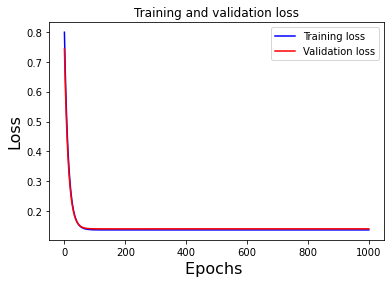

<Figure size 432x288 with 0 Axes>

In [246]:
plt.plot(range(len(training_loss)), training_loss, 'b', label='Training loss') #plotting training loss
plt.plot(range(len(val_loss)), val_loss, 'r', label='Validation loss') # plotting validation loss
plt.title('Training and validation loss')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.legend()
plt.figure()
plt.show()

Above image shows plot of the training and validation loss. As we can see, lr model is not overfitting since validation and training loss is reducing gradually.

Let's us now test our model on the test data 

In [247]:
test_predictions = tf.matmul(X_test, weights) + bias
print(compute_loss(y_test, test_predictions))

tf.Tensor(0.13659918, shape=(), dtype=float32)


The testing loss is slightly higher than the training loss.  Let's check the R square to understand  how well the model has captured the variance of the dependent variable.

Let's predict

In [248]:
#Coverting tesnor to numpy array
test_predictions=np.array(test_predictions)

#Lets Print the predicted prices 
test_predictionsk=model.predict(X_test)
y_pred1=target_scaler.inverse_transform(test_predictionsk.reshape(-1, 1))

In [249]:
target_scaler.inverse_transform(test_predictions.reshape(-1, 1))

array([[0.14153689],
       [0.1719978 ],
       [0.18016854],
       ...,
       [0.00199264],
       [0.1832842 ],
       [0.3378207 ]], dtype=float32)

 Let's check the R squared to understand  how well  model captured the variance of dependent variable.

In [250]:
sklearn.metrics.r2_score(target_scaler.inverse_transform(y_test.reshape(-1, 1)),target_scaler.inverse_transform(test_predictions.reshape(-1, 1)))

0.1693258426659796

<AxesSubplot:>

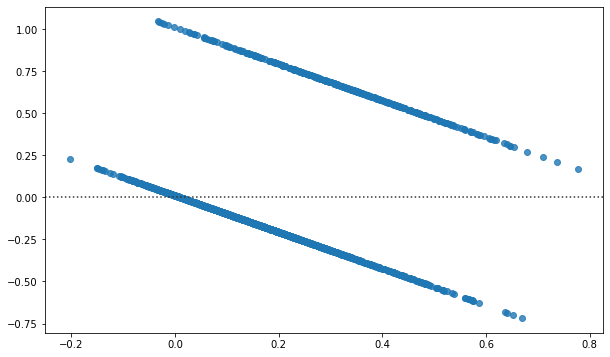

In [251]:
plt.figure(figsize=(10,6))
sns.residplot(x=test_predictions, y=y_test)

R2 is  0.1693258426659796. But we cannot use R-squared to determine whether the coefficient estimates and predictions are biased, which is why you must assess the residual plots.

R-squared does not indicate if a regression model provides an adequate fit to your data. A good model can have a low R2 value. On the other hand, a biased model can have a high R2 value!

### ROC-AUC Score
#### On train data

In [257]:
# final Logistic Regression model
lg = LogisticRegression(solver='newton-cg', C=0.0001, random_state=1, verbose =0)
lg.fit(X_train, y_train)

# prediction
X_test_lr = X_test
y_pred_lr = lg.predict(X_test_lr)



In [258]:
log_reg_model_train_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


Accuracy    Recall  Precision        F1
0     0.621  0.797017   0.321632  0.458313

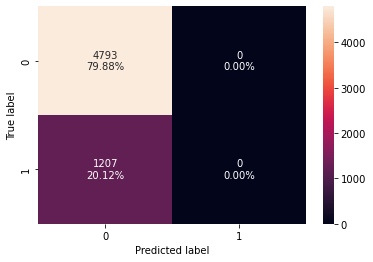

In [259]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_train, y_train)

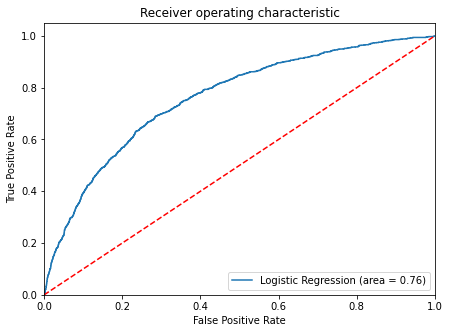

In [260]:
logit_roc_auc_train = roc_auc_score(y_train, lg.predict_proba(X_train)[:, 1])
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [261]:
logit_roc_auc_train

0.7603556069668709

ROC-AUC score of 0.69 on training is quite good.

### Model Performance Improvement¶

Let's see if the recall score can be improved further, by changing the model threshold using AUC-ROC Curve.

Optimal threshold using AUC-ROC curve

In [262]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.2049736


Checking model performance on the training set

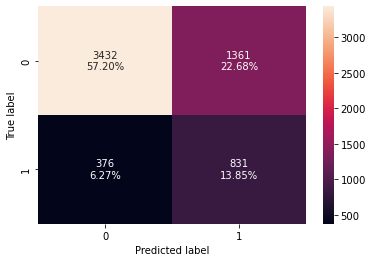

In [263]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)

In [264]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy    Recall  Precision        F1
0    0.7105  0.688484   0.379106  0.488967

### Model Performance Evaluation

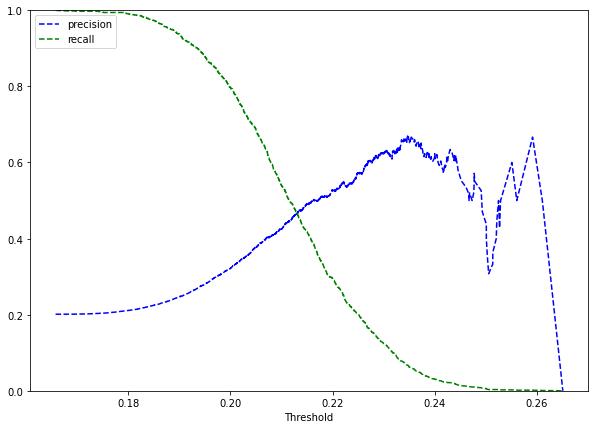

In [265]:
y_scores = lg.predict_proba(X_train)[:, 1]
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

At threshold around 0.20 we get a higher recall and a good precision

In [275]:
# setting the threshold
optimal_threshold_curve = 0.219

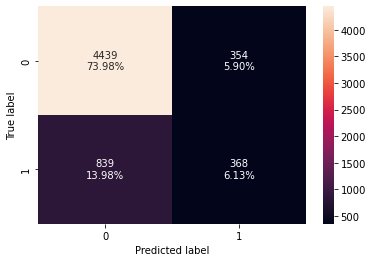

In [276]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)

In [277]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


Accuracy    Recall  Precision        F1
0  0.801167  0.304888   0.509695  0.381545

Model is performing well on training set.
Model has given a balanced performance, if the bank wishes to maintain a balance between recall and precision this model can be used.

**Conclusion:** 


- Higher Age Group exited more than than those in the lower age groups.
- Those having higher balance exited more than who hadn't.
- Bank should focus more on senior employees and try to enforce retainment policies.
- Bank should try to retain its high paying and financialy responsible employees.



